In [881]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [882]:
from pandas.core import resample as rp

In [883]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [884]:
expense_df = pd.read_csv("expense_data_1.csv")

In [885]:
expense_df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,150.0,Expense,NaN,150.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,120.0,Expense,NaN,120.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,80.0,Expense,NaN,80.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [886]:
expense_df.dtypes

Date               object
Account            object
Category           object
Subcategory       float64
Note               object
INR               float64
Income/Expense     object
Note.1            float64
Amount            float64
Currency           object
Account.1         float64
dtype: object

In [887]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [888]:
 missing_values=expense_df.columns[expense_df.isna().any()] ## checking the columns for which have NaN values

In [889]:
missing_values

Index(['Subcategory', 'Note', 'Note.1'], dtype='object')

In [890]:
expense_df=expense_df.drop(['Subcategory','Note.1','Account.1','Currency','INR'],axis=1)
##Dropping these columns due to NAN values, and similar typeof data in 1 or more columns

In [891]:
expense_df

,Date,Account,Category,Note,Income/Expense,Amount
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,Expense,150.0
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,Expense,300.0
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,Expense,120.0
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,Expense,80.0
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,Dinner,Expense,90.0
273,11/22/2021 14:16,CUB - online payment,Food,Lunch with company,Expense,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,Rapido,Expense,130.0
275,11/21/2021 15:50,CUB - online payment,Food,Lunch,Expense,875.0


In [892]:
expense_df=expense_df.dropna()##Drop NaN values rowwise

In [893]:
expense_df.isna().sum()## No NaN or missing value in dataset

Date              0
Account           0
Category          0
Note              0
Income/Expense    0
Amount            0
dtype: int64

In [894]:
expense_df.dtypes

Date               object
Account            object
Category           object
Note               object
Income/Expense     object
Amount            float64
dtype: object

In [895]:
expense_df.loc[:, 'Date'] = pd.to_datetime(expense_df['Date'])
expense_df

,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,150.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,120.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,80.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0
275,2021-11-21 15:50:00,CUB - online payment,Food,Lunch,Expense,875.0


In [896]:
expense_df.dtypes

Date               object
Account            object
Category           object
Note               object
Income/Expense     object
Amount            float64
dtype: object

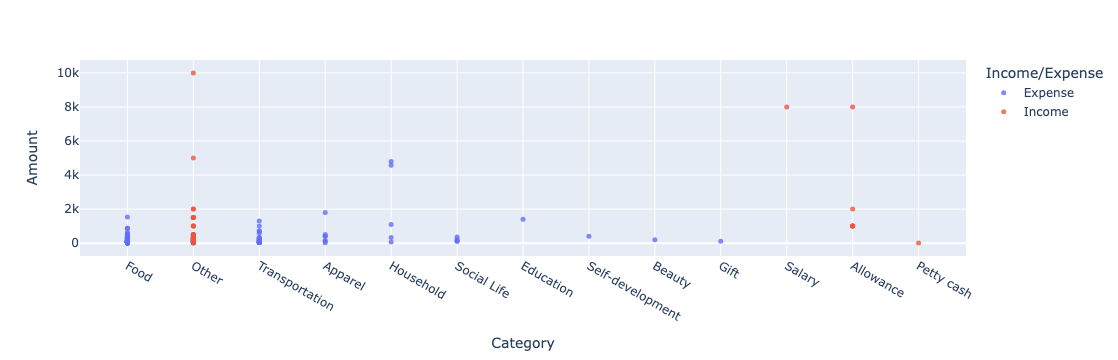

In [897]:
fig = px.scatter(expense_df,
                 x='Category',
                 y='Amount',
                 color='Income/Expense',
                 opacity=0.8,
                 title='')
fig.update_traces(marker_size=5)
fig.show()

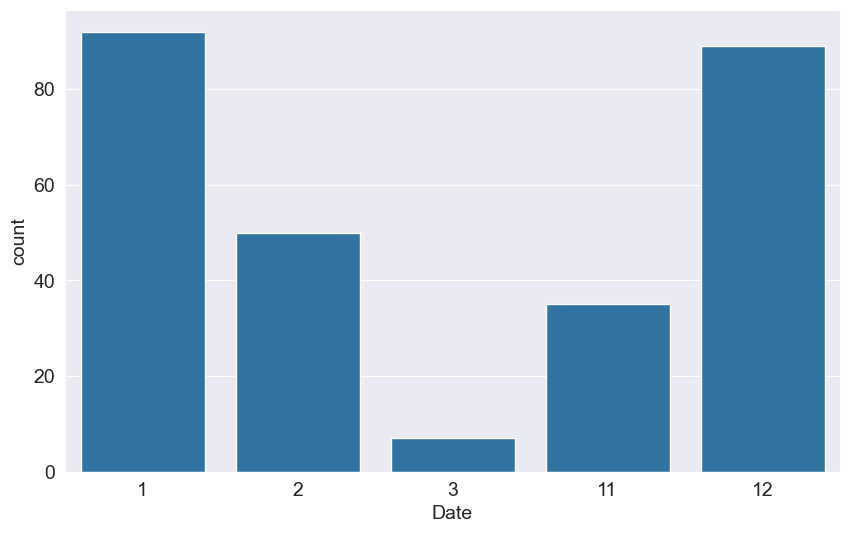

In [898]:
sns.countplot(x=pd.to_datetime(expense_df.Date).dt.month);

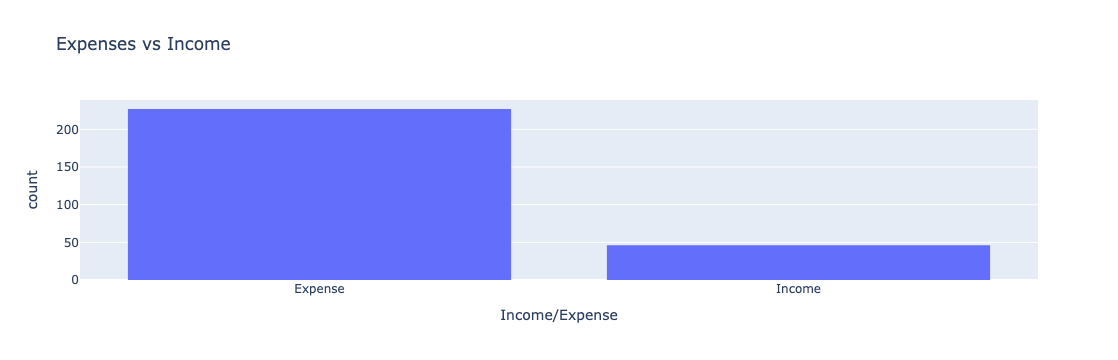

In [899]:
px.histogram(expense_df,'Income/Expense',title='Expenses vs Income')

In [900]:
len(expense_df) ##Total length of the dataset

273

In [901]:
income_df=expense_df[expense_df['Income/Expense']== 'Income'] # shifted the income from expense dataset

In [902]:
income_df

,Date,Account,Category,Note,Income/Expense,Amount
5,2022-03-01 18:22:00,CUB - online payment,Other,From vicky,Income,200.0
6,2022-03-01 18:21:00,CUB - online payment,Other,From dad,Income,500.0
8,2022-02-28 11:45:00,CUB - online payment,Other,From kumara,Income,200.0
11,2022-02-26 17:37:00,CUB - online payment,Other,From dad,Income,1500.0
45,2022-02-12 14:47:00,CUB - online payment,Other,From dad,Income,10000.0
48,2022-02-08 10:37:00,CUB - online payment,Other,From dad,Income,1000.0
54,2022-02-06 16:41:00,CUB - online payment,Other,Salary from dad,Income,5000.0
60,2022-02-02 20:14:00,CUB - online payment,Other,From dad,Income,500.0
75,2022-01-27 13:38:00,CUB - online payment,Other,From vicky,Income,300.0
76,2022-01-27 13:38:00,CUB - online payment,Other,From dad,Income,1500.0


In [903]:
len(income_df) # length of the new dataset

46

In [904]:
expense_df=expense_df.drop(expense_df.loc[expense_df['Income/Expense'].isin(['Income'])].index)
# dropping the orws which contains income

In [905]:
expense_df # new length of the dataset

,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,150.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,120.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,80.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,Dinner,Expense,179.0
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0


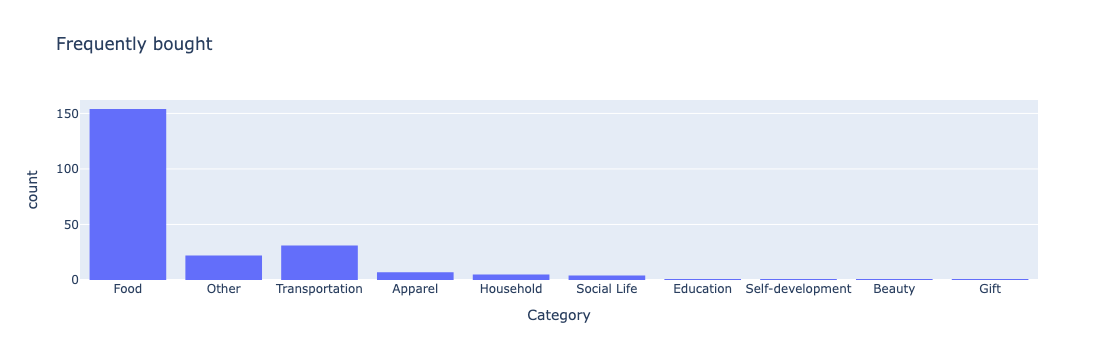

In [906]:
px.histogram(expense_df,'Category',title='Frequently bought')

In [907]:
##avg spending per category
numeric_columns = expense_df.select_dtypes(include='number').columns
avg_spending_category = expense_df.groupby('Category')[numeric_columns].mean().sort_values(by='Amount')
avg_spending_category

,Amount
Category,
Gift,115.000000
Food,151.439026
Beauty,196.000000
Social Life,203.430000
Other,232.590909
Transportation,244.800000
Self-development,400.000000
Apparel,484.000000
Education,1400.000000


Text(0.5, 1.0, 'Expense')

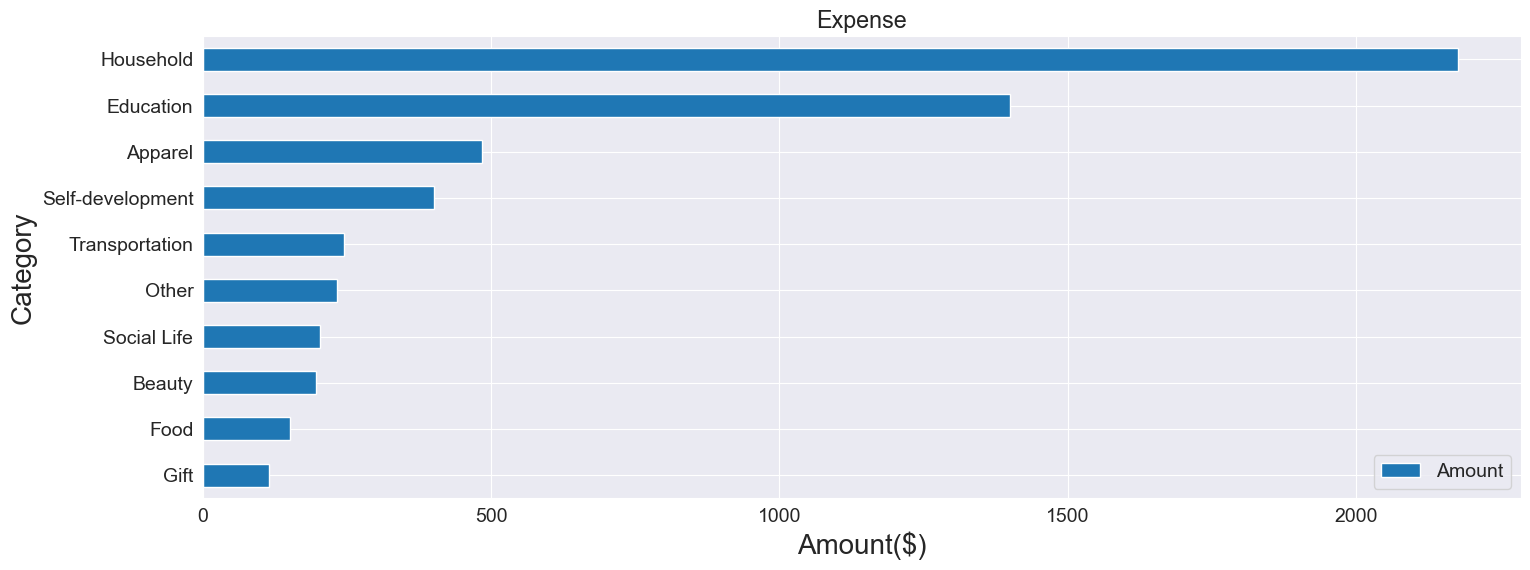

In [908]:
fig, ax = plt.subplots()
avg_spending_category.plot(kind='barh', ax=ax, figsize= (17,6))
ax.set_xlabel('Amount($)', size=20)
ax.set_ylabel('Category', size=20);
ax.set_title('Expense')

In [909]:
expense_amount=expense_df.Amount.sum() # Total amount of expense
expense_amount

53225.130000000005

In [910]:
income_amount=income_df.Amount.sum() # Total amount of income
income_amount

54854.0

In [911]:
expense_amount-income_amount

-1628.8699999999953

In [912]:
expense_df['Date'] = pd.to_datetime(expense_df['Date'], format='%d-%M-%Y')

In [913]:
expense_df.Date

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
271   2021-11-23 22:53:00
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
Name: Date, Length: 227, dtype: datetime64[ns]

<Axes: xlabel='Date'>

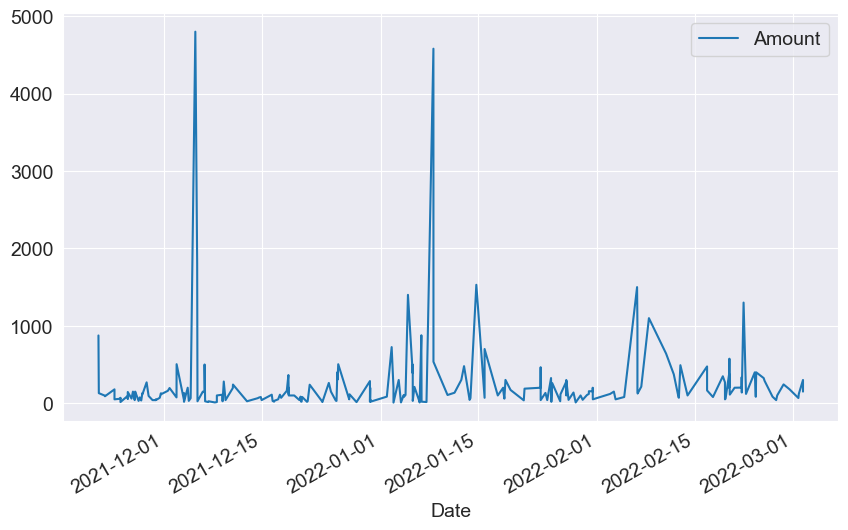

In [914]:
# Monthly spending

# Plotting monthly_spending
expense_df.plot(x='Date',y='Amount')

In [915]:
date=expense_df['Date'].dt.month

In [916]:
expense_df.set_index('Date').groupby(pd.Grouper(freq='ME')) ##Convrting object date into month wise
expense_df

,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,150.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,120.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,80.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,Dinner,Expense,179.0
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0


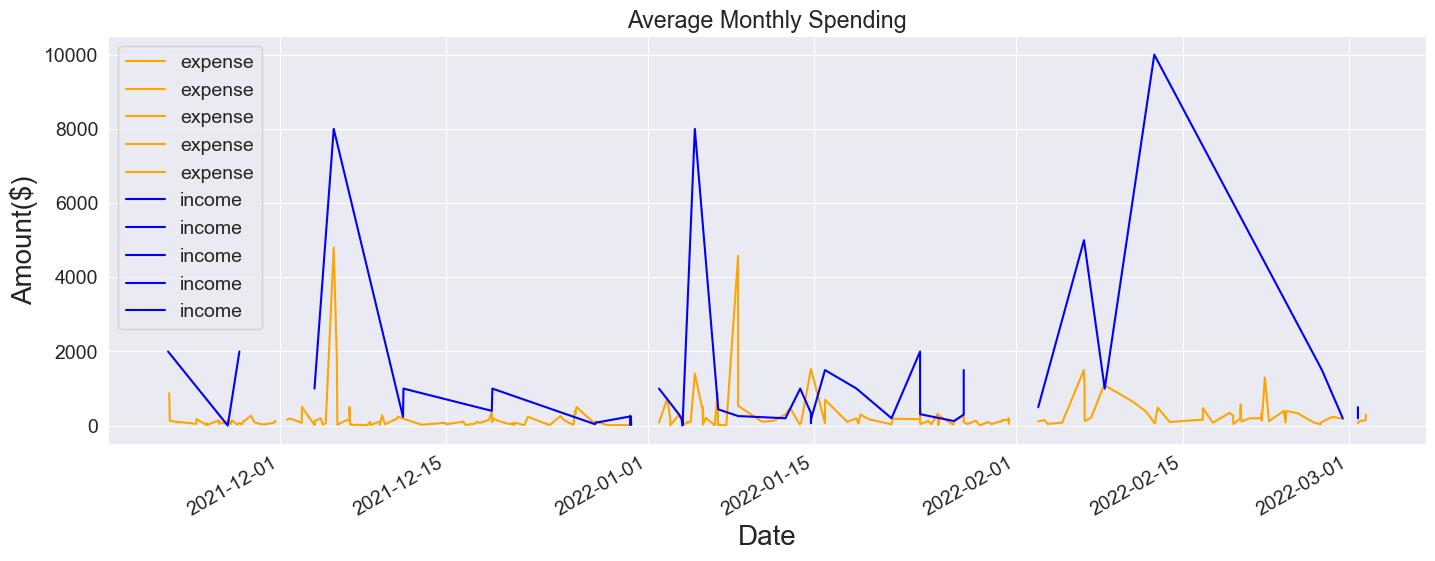

In [917]:
# Monthly spending
monthly_spending = expense_df.set_index('Date').groupby(rp.TimeGrouper(freq='ME')).Amount
monthly_income = income_df.set_index('Date').groupby(rp.TimeGrouper(freq='ME')).Amount

# Plotting monthly_spending

plt.title('Average Monthly Spending')
monthly_spending.plot(figsize=(17,6),label='expense', color='orange')
monthly_income.plot(figsize=(17,6),label='income', color='blue')
plt.legend()
plt.xlabel('Date', size=20)
plt.ylabel('Amount($)', size=20)
plt.show()

### Training on the dataset

## Linear Regression using a Single Feature

In [920]:
!pip install scikit-learn --quiet

In [921]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

In [922]:
category_code={'Food':0, 'Other':1, 'Transportation':2, 'Apparel':3, 'Household':4,
       'Social Life':5, 'Education':6, 'Self-development':7, 'Beauty':8, 'Gift':9
}

In [923]:
expense_df['category_code']=expense_df.Category.map(category_code)

In [924]:
# Define features and target
X = expense_df[['category_code', 'Amount']]
y = expense_df['Amount']

In [925]:
# Preprocess the features with OneHotEncoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Amount']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['category_code'])
    ])
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

In [926]:
# Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly_features),
    ('model', LinearRegression())
])

In [927]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with cross-validation
pipeline.fit(X_train, y_train)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print(f'Cross-validated RMSE: {rmse_cv:.2f}')

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate model performance on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on test set: {rmse_test:.2f}')

Cross-validated RMSE: 43.08
RMSE on test set: 0.00


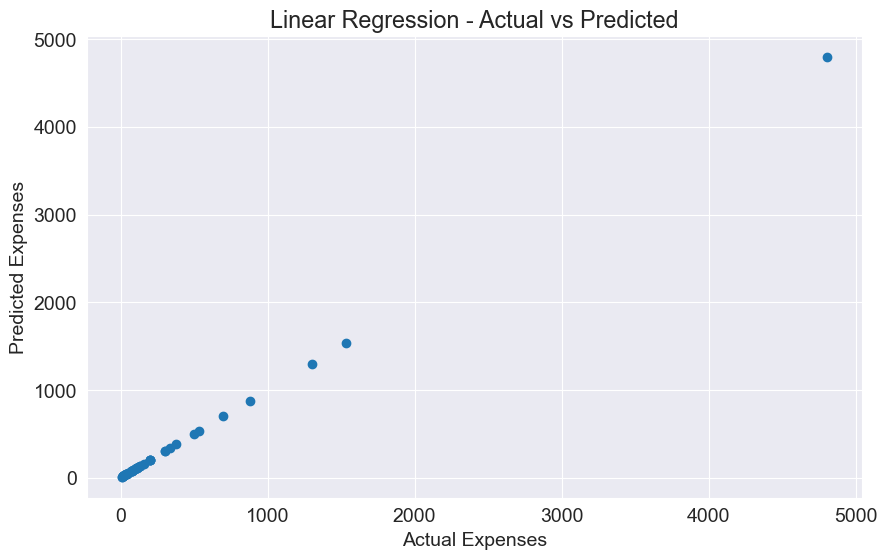

In [928]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

## Support Vector Regression

In [930]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [931]:
# Define the SVR model with hyperparameter tuning
svr = SVR()
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [932]:
# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(svr, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [933]:
# Use the best parameters found for final model training
best_svr = grid_search.best_estimator_

In [934]:
# Evaluate with cross-validation
cross_val_rmse = np.mean(np.sqrt(-cross_val_score(best_svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)))
print(f"Cross-validated RMSE: {cross_val_rmse:.2f}")

Cross-validated RMSE: 0.01


In [935]:
# Test set evaluation
best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {test_rmse:.2f}")

RMSE on test set: 0.01


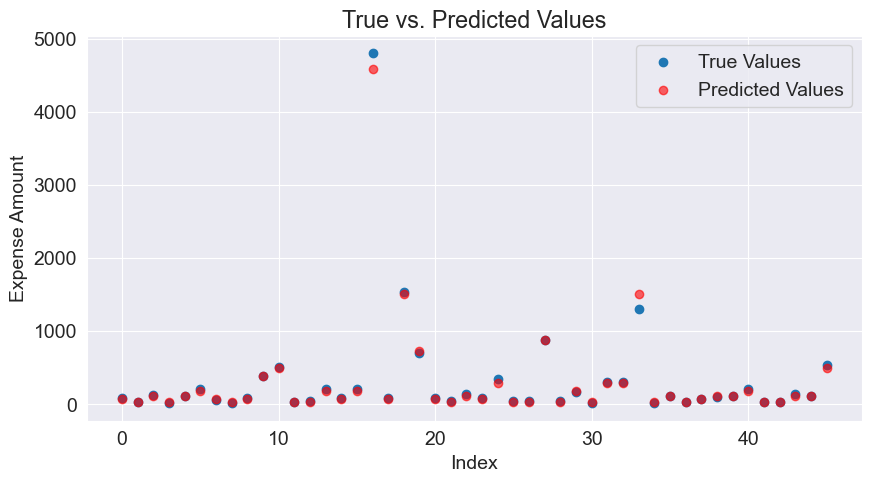

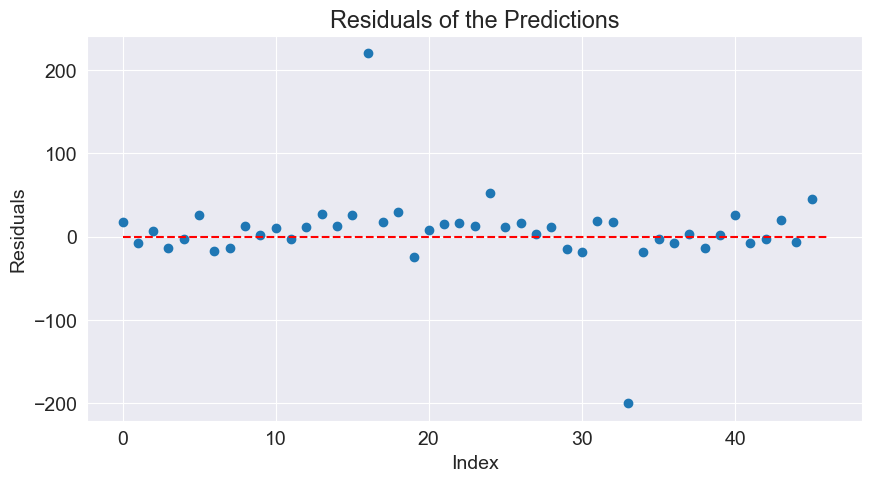

In [1055]:
# Plotting the True vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.title('True vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Expense Amount')
plt.legend()
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals)
plt.hlines(0, xmin=0, xmax=len(residuals), colors='red', linestyles='dashed')
plt.title('Residuals of the Predictions')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

## Time Series Analysis

In [938]:
expense_df.Date

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
271   2021-11-23 22:53:00
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
Name: Date, Length: 227, dtype: datetime64[ns]

In [939]:
!pip install prophet

In [940]:
from prophet import Prophet

In [941]:
expense_df_TSA=expense_df

In [942]:
expense_df_TSA = expense_df.drop(['Account', 'Category', 'Note', 'Income/Expense', 'category_code'], axis=1)

In [943]:
expense_df_TSA.rename(columns={'Date': 'ds', 'Amount': 'y'}, inplace=True)

In [944]:
expense_df_TSA

,ds,y
0,2022-03-02 10:11:00,150.0
1,2022-03-02 10:11:00,300.0
2,2022-03-01 19:50:00,120.0
3,2022-03-01 18:56:00,80.0
4,2022-03-01 18:22:00,67.0
...,...,...
271,2021-11-23 22:53:00,179.0
272,2021-11-22 14:16:00,90.0
273,2021-11-22 14:16:00,97.0
274,2021-11-21 17:07:00,130.0


In [945]:
p = Prophet(interval_width=0.92, daily_seasonality=True)
model = p.fit(expense_df_TSA)

04:42:34 - cmdstanpy - INFO - Chain [1] start processing
04:42:34 - cmdstanpy - INFO - Chain [1] done processing


In [946]:
future = p.make_future_dataframe(periods=36,freq='ME')

In [947]:
forecast_prediction = p.predict(future)

In [948]:
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
240,2024-10-31 10:11:00,786.514376,-138.875516,1523.793901,786.140164,786.927956,-49.233589,-49.233589,-49.233589,102.378534,102.378534,102.378534,-151.612123,-151.612123,-151.612123,0.0,0.0,0.0,737.280787
241,2024-11-30 10:11:00,804.417683,137.546954,1739.351223,804.029191,804.851864,136.441532,136.441532,136.441532,102.378534,102.378534,102.378534,34.062999,34.062999,34.062999,0.0,0.0,0.0,940.859216
242,2024-12-31 10:11:00,822.917768,43.190383,1652.098694,822.514169,823.375870,16.899113,16.899113,16.899113,102.378534,102.378534,102.378534,-85.479421,-85.479421,-85.479421,0.0,0.0,0.0,839.816880
243,2025-01-31 10:11:00,841.417852,117.536645,1742.814404,840.997736,841.899897,88.640174,88.640174,88.640174,102.378534,102.378534,102.378534,-13.738360,-13.738360,-13.738360,0.0,0.0,0.0,930.058026
244,2025-02-28 10:11:00,858.127606,86.925406,1803.798008,857.690420,858.634048,88.640174,88.640174,88.640174,102.378534,102.378534,102.378534,-13.738360,-13.738360,-13.738360,0.0,0.0,0.0,946.767780


Text(0.5, 1.0, 'Expense Forecast')

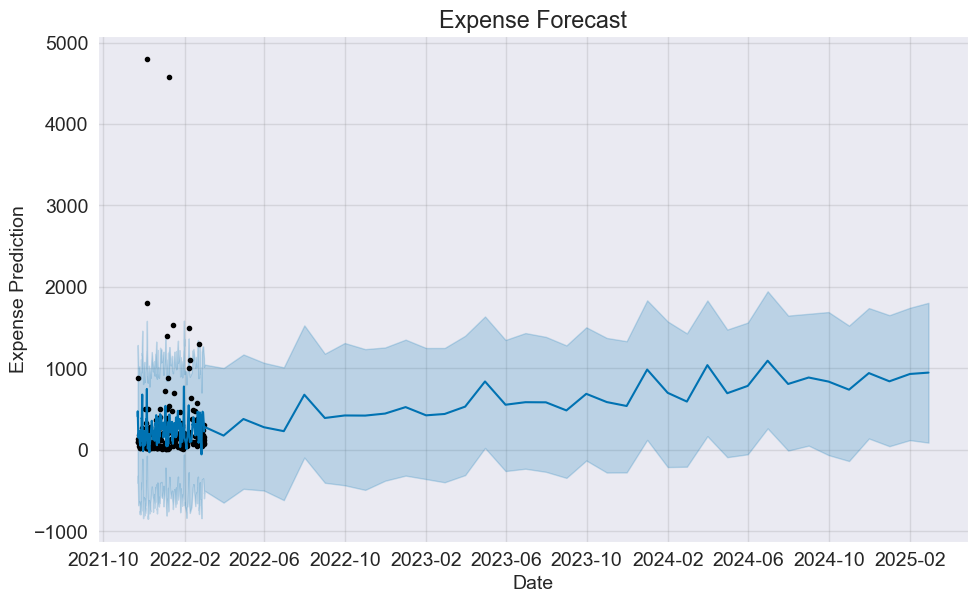

In [949]:
p.plot(forecast_prediction)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Expense Prediction')
plt.title('Expense Forecast')



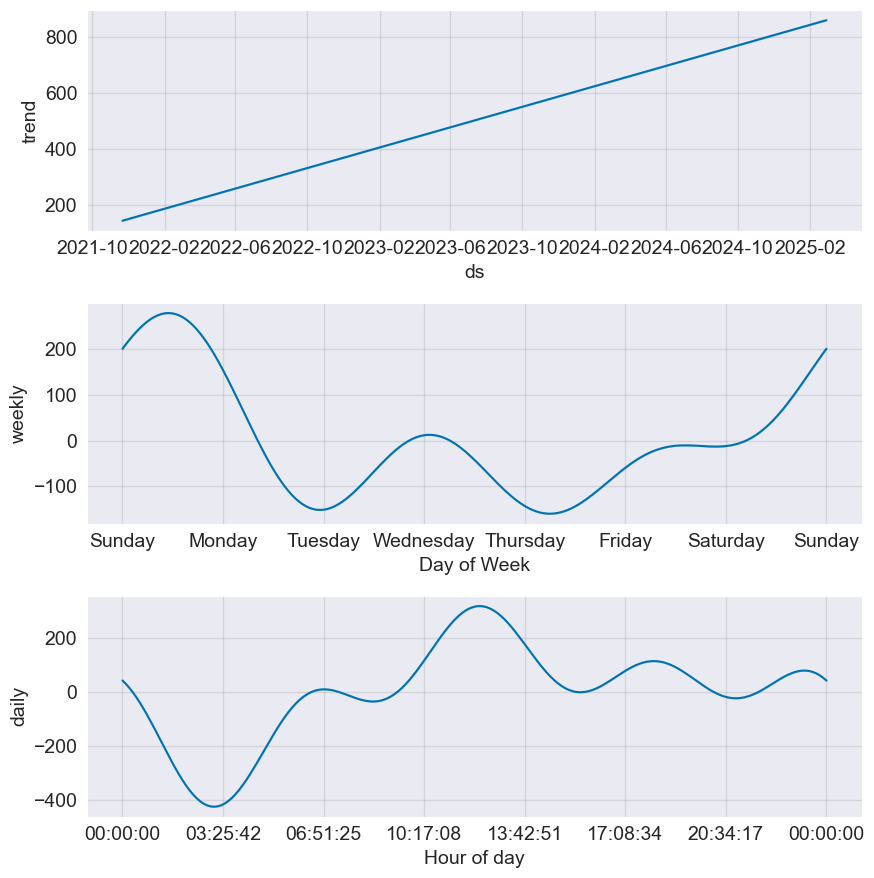

In [950]:
fig = p.plot_components(forecast_prediction)
plt.show()


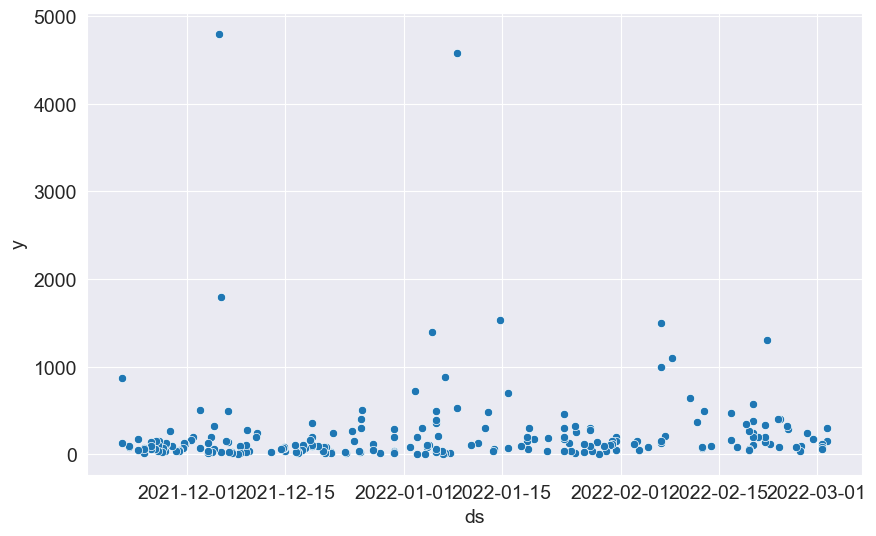

In [951]:
sns.scatterplot(x='ds', y='y', data=expense_df_TSA)
plt.show()

In [952]:
# Create some dummy data
data = expense_df['Amount']

# Create windows of size 4
windows = data.rolling(2)

# Apply a function to each window to get the inputs and outputs
# For example, use the mean as input and the last value as output
X = windows.mean().dropna()
y = windows.apply(lambda x: x.iloc[-1]).dropna()

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

# Make predictions on new data
new_data = pd.Series([0,299])
new_window = new_data.rolling(2).mean().dropna()
prediction = model.predict(new_window.values.reshape(-1, 1))
print("Predicted value:", prediction)


Predicted value: [[150.84468338]]


In [953]:
# Create some dummy data
data = expense_df['Amount']

# Define rolling windows and calculate X and y
windows = data.rolling(2)

# Apply a function to each window to get the inputs and outputs
# For example, use the mean as input and the last value as output
X = windows.mean().dropna()                       
y = windows.apply(lambda x: x.iloc[-1]).dropna() 

# Standardize the features for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X.values.reshape(-1, 1))
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Create and fit the SVR model
model = SVR(kernel='rbf')  
model.fit(X_scaled, y_scaled)

# Make predictions on new data
new_data = pd.Series([0, 299])
new_window = new_data.rolling(2).mean().dropna()
new_window_scaled = scaler_X.transform(new_window.values.reshape(-1, 1))

# Predict and inverse-transform to original scale
prediction_scaled = model.predict(new_window_scaled)
prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1))

print("Predicted value:", prediction[0][0])


Predicted value: 149.49606847860628


## Decision Tree

In [955]:
# Features (X) and target (y)
X = expense_df[['category_code', 'Amount']]  # Added 'Amount' for more feature variety
y = expense_df['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for the Decision Tree Regressor
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for finding the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters for Decision Tree:", best_params)

# Train the Decision Tree Regressor with best parameters
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train, y_train)

# Predictions
y_pred = best_regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Root Mean Squared Error (RMSE): 47.33
R^2 Score: 1.00


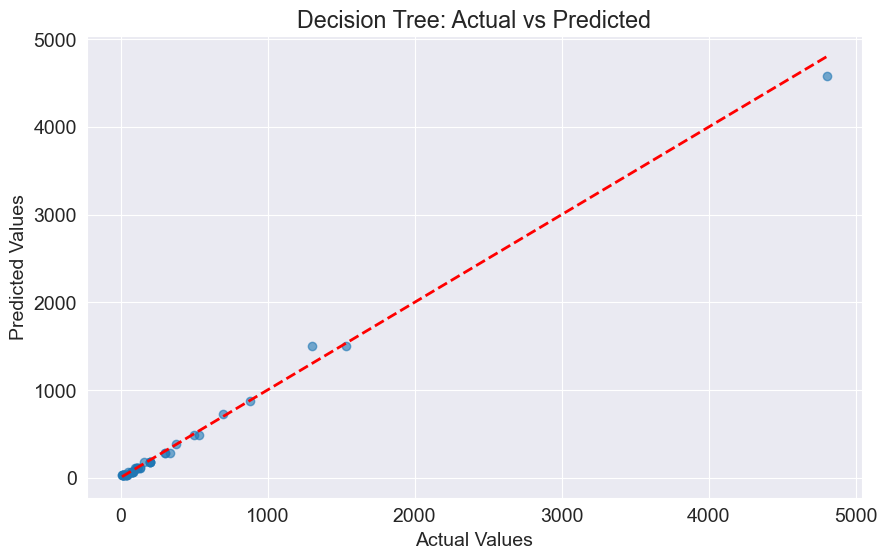

In [1047]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()